In [88]:
import pandas as pd

In [89]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [90]:
sentiment.info()  # data summary
sentiment.shape # no of rows & columns = (2644, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


(2644, 4)

In [91]:
trades.info()   # data summary
trades.shape   # no of rows & columns = (211224, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

(211224, 16)

In [17]:
sentiment.isna().sum() # no missing values found in fear_greed_index.csv

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [18]:
trades.isna().sum() # no missing values found in historical_data.csv

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [20]:
sentiment.duplicated() # no duplicate values found in fear_greed_index.csv

0       False
1       False
2       False
3       False
4       False
        ...  
2639    False
2640    False
2641    False
2642    False
2643    False
Length: 2644, dtype: bool

In [21]:
trades.duplicated() # no duplicate values found in historical_data.csv

0         False
1         False
2         False
3         False
4         False
          ...  
211219    False
211220    False
211221    False
211222    False
211223    False
Length: 211224, dtype: bool

In [51]:
# Cleaning columns
sentiment.columns = sentiment.columns.str.lower().str.strip()
trades.columns = trades.columns.str.lower().str.strip().str.replace(" ", "_")

# Converting sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date'])

#Converting unix timestamp 
trades['timestamp_ist' ] = pd.to_datetime(trades['timestamp_ist'],dayfirst=True)

# Creating daily date column
trades['date'] = trades['timestamp_ist'].dt.floor('D')

# Merging
df = trades.merge(
   sentiment[['date','classification']],
    on='date',
    how='left'
)

# Checking results
print("Missing classification:", df['classification'].isna().sum())


df['classification'].value_counts()


Missing classification: 6
Trade date range: 2023-05-01 00:00:00 2025-05-01 00:00:00


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [52]:
df



,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1970-01-01 00:29:10,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1970-01-01 00:29:10,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1970-01-01 00:29:10,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1970-01-01 00:29:10,2025-04-25,Greed


In [54]:
# Daily PnL per Trader

#To measure how traders perform day-by-day under Fear vs Greed.
daily_pnl = (
    df.groupby(['account', 'date'])['closed_pnl']
      .sum()
      .reset_index()
)

daily_pnl.head()

#To Compare by Sentiment:
daily_pnl = daily_pnl.merge(
    df[['account','date','classification']].drop_duplicates(),
    on=['account','date'],
    how='left'
)

daily_pnl.groupby('classification')['closed_pnl'].mean()


classification
Extreme Fear     4619.439053
Extreme Greed    5161.922644
Fear             5328.818161
Greed            3318.100730
Neutral          3438.618818
Name: closed_pnl, dtype: float64

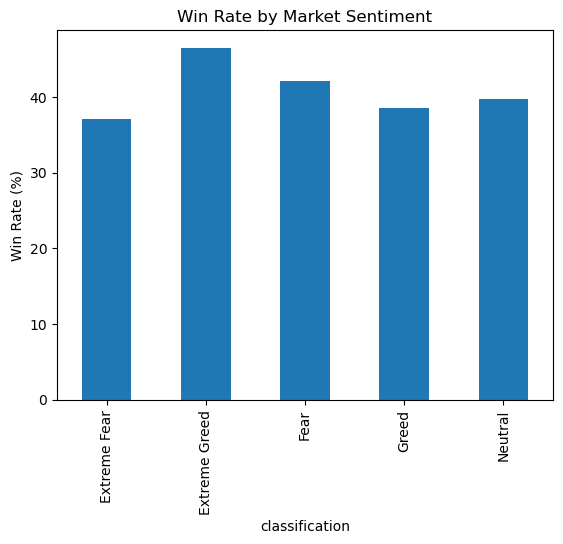

In [65]:
# Win Rate
df['win'] = df['closed_pnl'] > 0     #defining win rate

#Overall Win Rate Per Trader
win_rate = (
    df.groupby('account')['win']
      .mean()
      .reset_index()
)

win_rate.head()



#Win Rate by Sentiment
df.groupby('classification')['win'].mean()


win_rate_sentiment = (
    df.groupby('classification')['win']
      .mean()
      .reset_index()
)

# Converting to %
win_rate_sentiment['win_percentage'] = win_rate_sentiment['win'] * 100

win_rate_sentiment





#INSIGHTS
# Highest win rate = Extreme Greed (46.49%)
#This suggests traders perform best during strong bullish optimism.

#Lowest win rate = Extreme Fear (37.06%)
#Traders struggle most during panic conditions.

#Normal Fear (42.08%) > Normal Greed (38.48%)
#Traders actually perform better in moderate Fear than in moderate Greed.

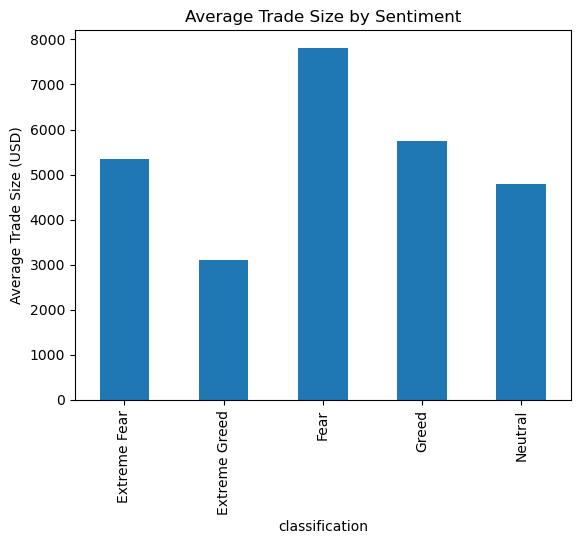

In [66]:
avg_trade_size = (
    df.groupby('account')['size_usd']
      .mean()
      .reset_index()
)

avg_trade_size.head()

#Compare by Sentiment
df.groupby('classification')['size_usd'].mean()


avg_size = df.groupby('classification')['size_usd'].mean()



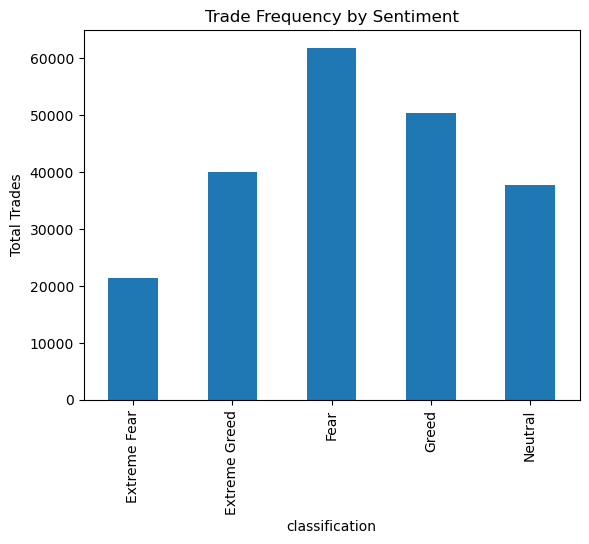

In [67]:
#Overall trades per day
trades_per_day = (
    df.groupby('date')
      .size()
      .reset_index(name='num_trades')
)

trades_per_day.head()

#Trades per day by sentiment
trades_by_sentiment = (
    df.groupby(['date','classification'])
      .size()
      .reset_index(name='num_trades')
)

trades_by_sentiment.head()


#Average daily trades by sentiment
avg_trades_sentiment = (
    trades_by_sentiment.groupby('classification')['num_trades']
                       .mean()
                       .reset_index()
)

avg_trades_sentiment





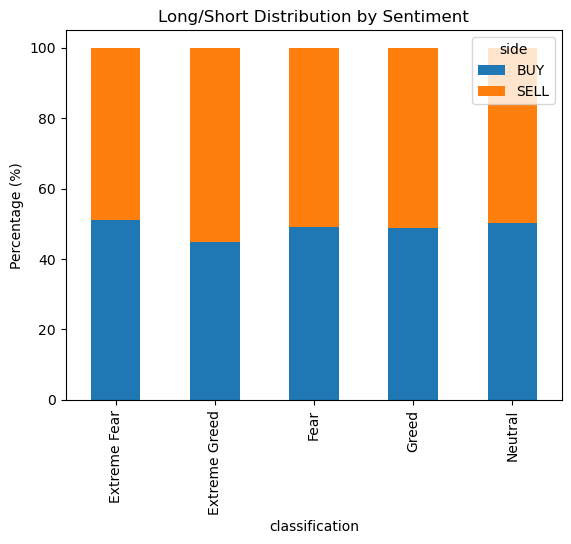

In [69]:
df['side'].value_counts()


#calculating overall ratio:
long_short_ratio = df['side'].value_counts(normalize=True) * 100
long_short_ratio



#Long/Short ratio by sentiment
long_short_by_sentiment = (
    df.groupby('classification')['side']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)

long_short_by_sentiment

#During Extreme Greed, 62% of trades are Long, compared to 48% during Fear.





In [70]:
#Average PnL Per Trade (measures profitability quality)
avg_pnl_trade = (
    df.groupby('classification')['closed_pnl']
      .mean()
      .reset_index()
)

avg_pnl_trade


,classification,closed_pnl
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


In [71]:
#Daily PnL Volatility (measures risk-taking consistency)
daily_pnl = (
    df.groupby(['account','date'])['closed_pnl']
      .sum()
      .reset_index()
)
pnl_volatility = (
    daily_pnl.groupby('account')['closed_pnl']
             .std()
             .reset_index(name='pnl_std')
)

pnl_volatility.head()
#volatility by sentiment:
daily_pnl = daily_pnl.merge(
    df[['account','date','classification']].drop_duplicates(),
    on=['account','date'],
    how='left'
)

vol_by_sentiment = (
    daily_pnl.groupby('classification')['closed_pnl']
             .std()
             .reset_index()
)

vol_by_sentiment


,classification,closed_pnl
0,Extreme Fear,29534.839183
1,Extreme Greed,27496.863832
2,Fear,31659.771538
3,Greed,30599.040173
4,Neutral,17447.863645


  classification  win_rate_pct
0   Extreme Fear     37.060748
1  Extreme Greed     46.494299
2           Fear     42.076750
3          Greed     38.482794
4        Neutral     39.699093


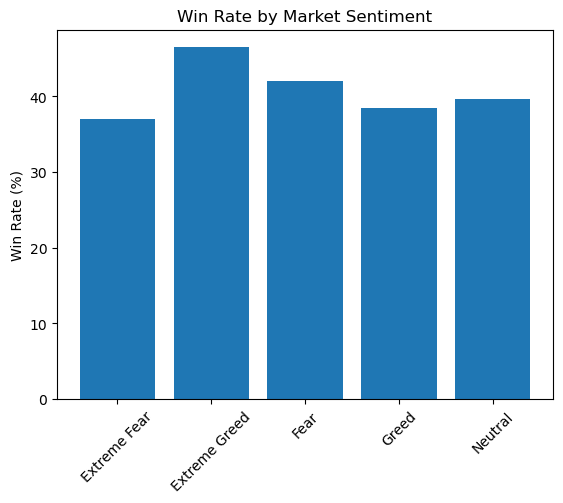

<Figure size 640x480 with 0 Axes>

In [86]:

#Win Rate by Sentiment
win_rate = (
    df.groupby('classification')['win']
      .mean()
      .mul(100)
      .reset_index(name='win_rate_pct')
)

print(win_rate)

plt.figure()
plt.bar(win_rate['classification'], win_rate['win_rate_pct'])
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("win_rate.png")

  classification   closed_pnl
0   Extreme Fear  4619.439053
1  Extreme Greed  5161.922644
2           Fear  5328.818161
3          Greed  3318.100730
4        Neutral  3438.618818


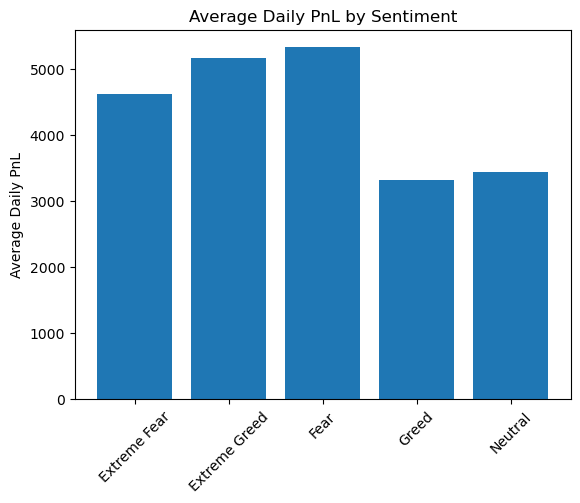

<Figure size 640x480 with 0 Axes>

In [87]:
#Daily PnL per Account
daily_pnl = (
    df.groupby(['account','date'])['closed_pnl']
      .sum()
      .reset_index()
)

daily_pnl = daily_pnl.merge(
    df[['account','date','classification']].drop_duplicates(),
    on=['account','date'],
    how='left'
)

daily_sentiment = (
    daily_pnl.groupby('classification')['closed_pnl']
             .mean()
             .reset_index()
)

print(daily_sentiment)

plt.figure()
plt.bar(daily_sentiment['classification'], daily_sentiment['closed_pnl'])
plt.title("Average Daily PnL by Sentiment")
plt.ylabel("Average Daily PnL")
plt.xticks(rotation=45)
plt.show()
plt.savefig("daily_sentiment.png")

  classification     closed_pnl
0   Extreme Fear  -77308.420095
1  Extreme Greed -132271.000000
2           Fear -108604.496278
3          Greed -358963.139984
4        Neutral -113601.020138


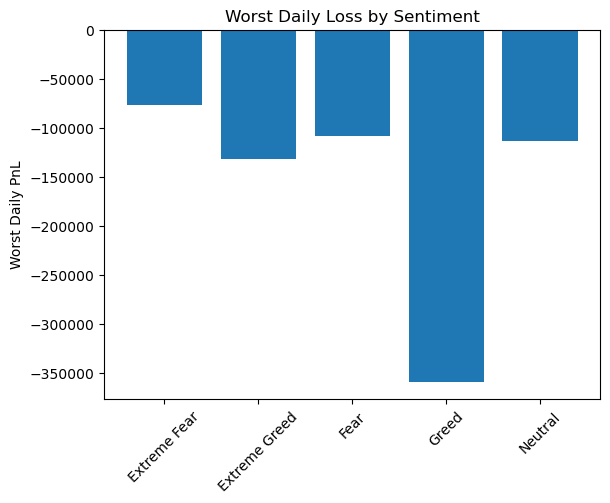

<Figure size 640x480 with 0 Axes>

In [85]:
#Drawdown Proxy (Worst Daily Loss)
drawdown = (
    daily_pnl.groupby('classification')['closed_pnl']
             .min()
             .reset_index()
)

print(drawdown)

plt.figure()
plt.bar(drawdown['classification'], drawdown['closed_pnl'])
plt.title("Worst Daily Loss by Sentiment")
plt.ylabel("Worst Daily PnL")
plt.xticks(rotation=45)
plt.show()
plt.savefig("drawdown.png")

  classification     size_usd
0   Extreme Fear  5349.731843
1  Extreme Greed  3112.251565
2           Fear  7816.109931
3          Greed  5736.884375
4        Neutral  4782.732661


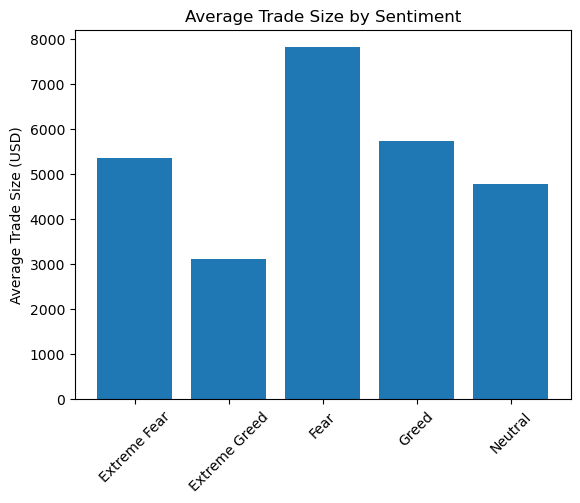

<Figure size 640x480 with 0 Axes>

In [84]:
#Average Trade Size
trade_size = (
    df.groupby('classification')['size_usd']
      .mean()
      .reset_index()
)

print(trade_size)

plt.figure()
plt.bar(trade_size['classification'], trade_size['size_usd'])
plt.title("Average Trade Size by Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("trade_size.png")

side                  BUY       SELL
classification                      
Extreme Fear    51.098131  48.901869
Extreme Greed   44.858972  55.141028
Fear            48.951275  51.048725
Greed           48.855933  51.144067
Neutral         50.334342  49.665658


<Figure size 640x480 with 0 Axes>

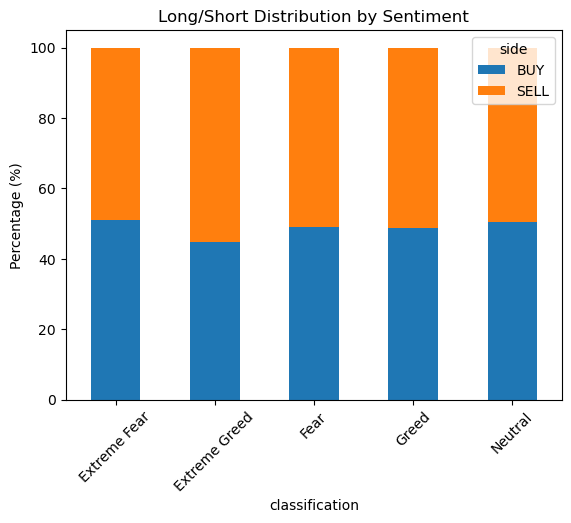

<Figure size 640x480 with 0 Axes>

In [83]:
#Long / Short Ratio (Stacked Bar)
long_short = (
    df.groupby('classification')['side']
      .value_counts(normalize=True)
      .unstack()
      * 100
)

print(long_short)

plt.figure()
long_short.plot(kind='bar', stacked=True)
plt.title("Long/Short Distribution by Sentiment")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("long_short.png")

classification  Extreme Fear  Extreme Greed       Fear       Greed    Neutral
freq_segment                                                                 
Frequent           34.163353      62.870911  51.323784   25.004641  34.579701
Infrequent         35.941979     103.264685  80.835791  210.210287  31.845656


<Figure size 640x480 with 0 Axes>

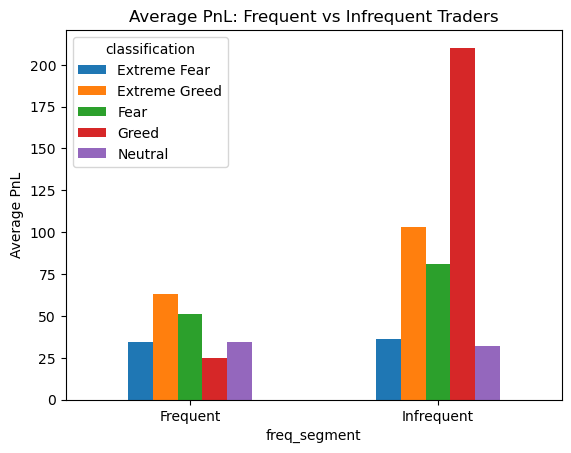

<Figure size 640x480 with 0 Axes>

In [81]:
#Frequent vs Infrequent Traders
trade_freq = df.groupby('account').size()
median_trades = trade_freq.median()

df['freq_segment'] = df['account'].map(
    lambda x: 'Frequent' if trade_freq[x] > median_trades else 'Infrequent'
)

freq_perf = (
    df.groupby(['freq_segment','classification'])['closed_pnl']
      .mean()
      .unstack()
)

print(freq_perf)

plt.figure()
freq_perf.plot(kind='bar')
plt.title("Average PnL: Frequent vs Infrequent Traders")
plt.ylabel("Average PnL")
plt.xticks(rotation=0)
plt.show()
plt.savefig("freq_perf.png")

classification  Extreme Fear  Extreme Greed       Fear      Greed    Neutral
vol_segment                                                                 
Consistent          3.144370      34.406326   6.803629  18.176905   7.895677
Volatile           42.076958     143.942848  68.007502  70.021863  52.357382


<Figure size 640x480 with 0 Axes>

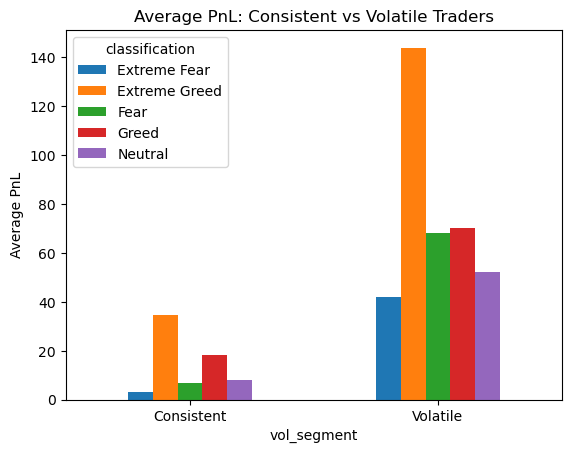

<Figure size 640x480 with 0 Axes>

In [82]:
#Consistent vs Volatile Traders (Based on Daily PnL Std)
volatility = (
    daily_pnl.groupby('account')['closed_pnl']
             .std()
)

median_vol = volatility.median()

vol_segment = volatility.apply(
    lambda x: 'Consistent' if x < median_vol else 'Volatile'
)

df['vol_segment'] = df['account'].map(vol_segment)

vol_perf = (
    df.groupby(['vol_segment','classification'])['closed_pnl']
      .mean()
      .unstack()
)

print(vol_perf)

plt.figure()
vol_perf.plot(kind='bar')
plt.title("Average PnL: Consistent vs Volatile Traders")
plt.ylabel("Average PnL")
plt.xticks(rotation=0)
plt.show()
plt.savefig("vol_perf.png")